Preview of dataset:


,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB

Summary Statistics:


,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000



Model Evaluation Scores:
MAE : 10.553442622950818
MSE : 488.3330071038251
RMSE: 22.098258010617602
R² Score: 0.9826261519979012


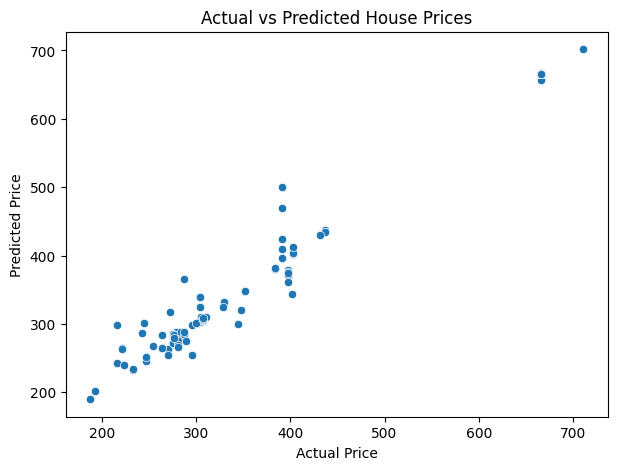

267.25333333333333

In [8]:

# PART 1: CRISP–DM PIPELINE USING HousingData.xlsx

# --- Imports ---
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# 1. DATA UNDERSTANDING

df_house = pd.read_excel("HousingData.xlsx")
print("Preview of dataset:")
display(df_house.head())

print("\nDataset Info:")
df_house.info()

print("\nSummary Statistics:")
display(df_house.describe())


# 2. DATA PREPARATION


# --- Handle missing values ---
df_house = df_house.dropna()      

# --- Encode categorical variables ---
df_house = pd.get_dummies(df_house, drop_first=True)


# Feature / Target split

target_column = "TAX"   # CHANGE if your dataset uses a different label
X = df_house.drop(columns=[target_column])
y = df_house[target_column]


# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3. MODELING

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)


# 4. EVALUATION

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Scores:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


# Actual vs Predicted visualization

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


# 5. DEPLOYMENT

def predict_price(new_data_dict):
    """
    Accepts a dictionary of feature values and returns predicted price.
    """
    df_new = pd.DataFrame([new_data_dict])

    df_new = pd.get_dummies(df_new)
    df_new = df_new.reindex(columns=X.columns, fill_value=0)

    scaled = scaler.transform(df_new)
    return model.predict(scaled)[0]

# Example:
predict_price({"Bedrooms": 3, "Bathrooms": 2, "Area": 1800})


In [ ]:
# PART 2: ASSOCIATION RULE  USING Cassava_Yield.xlsx

!pip install mlxtend --quiet

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


# Load dataset

df_cassava = pd.read_excel("Cassava_Yield_Data.xlsx")
print("Raw Dataset:")
display(df_cassava.head())


# CLEANING & PREPARATION

# Remove non-item columns
possible_non_items = ["Season", "Plot", "Plot_ID", "Farmer", "Variety", "Yield", "Date"]
non_item_cols = [col for col in possible_non_items if col in df_cassava.columns]

df_items = df_cassava.drop(columns=non_item_cols)

print("\nColumns used for Association Rule Mining:")
print(df_items.columns.tolist())

# Convert all values to strings (for correct encoding)
df_items = df_items.astype(str)

# Convert to one-hot encoded binary transaction matrix
df_trans = pd.get_dummies(df_items)

print("\nBinary Transaction Matrix:")
display(df_trans.head())


# MINING FREQUENT ITEMSETS

frequent = apriori(df_trans, min_support=0.2, use_colnames=True)
print("\nFrequent Itemsets:")
display(frequent)


# ASSOCIATION RULES

rules = association_rules(frequent, metric="lift", min_threshold=1)

# Sort by confidence for easier interpretation
rules_sorted = rules.sort_values("confidence", ascending=False)

print("\nAssociation Rules (Sorted):")
display(rules_sorted)


# Interpretation Example

print("\n--- Top 5 Rules Explained ---\n")
for i in range(min(5, len(rules_sorted))):
    antecedent = list(rules_sorted.iloc[i]["antecedents"])
    consequent = list(rules_sorted.iloc[i]["consequents"])
    confidence = rules_sorted.iloc[i]["confidence"]
    lift = rules_sorted.iloc[i]["lift"]

    print(f"Rule {i+1}: If a farmer uses {antecedent},")
    print(f"         They are likely to also use {consequent}.")
    print(f"         Confidence = {confidence:.2f}, Lift = {lift:.2f}\n")


Raw Dataset:



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830



Columns used for Association Rule Mining:
['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT', 'Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC', 'TotalWeightperhectare', 'TotalTuberperHectare']

Binary Transaction Matrix:


,Sesn_1,Sesn_2,locn_1,locn_2,block_1,block_2,block_3,rep_1,rep_2,rep_3,...,TotalTuberperHectare_688679.2452830188,TotalTuberperHectare_696226.4150943396,TotalTuberperHectare_698113.2075471699,TotalTuberperHectare_709433.9622641511,TotalTuberperHectare_716981.1320754717,TotalTuberperHectare_735849.0566037736,TotalTuberperHectare_786792.4528301887,TotalTuberperHectare_792857.1428571427,TotalTuberperHectare_822641.5094339623,TotalTuberperHectare_835849.0566037736
0,False,True,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,True,True,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,True,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,True,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False



Frequent Itemsets:


,support,itemsets
0,0.478261,(Sesn_1)
1,0.521739,(Sesn_2)
2,0.478261,(locn_1)
3,0.521739,(locn_2)
4,0.304348,(block_1)
...,...,...
274,0.200000,"(HEC_10000, rep_2, No_bigtubers_0, Weigh_bigtu..."
275,0.200000,"(HEC_10000, No_bigtubers_0, Weigh_bigtubers_0...."
276,0.243478,"(HEC_10000, tillage _minimum, No_bigtubers_0, ..."
277,0.243478,"(HEC_10000, No_bigtubers_0, locn_2, Weigh_bigt..."



Association Rules (Sorted):


c:\Users\agwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1459,"(Sesn_2, locn_2, HEC_10000, Weigh_bigtubers_0.0)",(No_bigtubers_0),0.243478,0.565217,0.243478,1.0,1.769231,1.0,0.105860,inf,0.574713,0.430769,1.0,0.715385
739,"(No_bigtubers_0, locn_2, Sesn_2)",(Weigh_bigtubers_0.0),0.243478,0.565217,0.243478,1.0,1.769231,1.0,0.105860,inf,0.574713,0.430769,1.0,0.715385
704,"(Sesn_2, Plants_harvested_28)","(locn_1, plotsize_5.3)",0.260870,0.260870,0.260870,1.0,3.833333,1.0,0.192817,inf,1.000000,1.000000,1.0,1.000000
705,"(plotsize_5.3, Sesn_2)","(locn_1, Plants_harvested_28)",0.260870,0.260870,0.260870,1.0,3.833333,1.0,0.192817,inf,1.000000,1.000000,1.0,1.000000
707,(Plants_harvested_28),"(locn_1, plotsize_5.3, Sesn_2)",0.260870,0.260870,0.260870,1.0,3.833333,1.0,0.192817,inf,1.000000,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,(HEC_10000),"(locn_1, No_bigtubers_0, Weigh_bigtubers_0.0)",1.000000,0.200000,0.200000,0.2,1.000000,1.0,0.000000,1.0,0.000000,0.200000,0.0,0.600000
93,(HEC_10000),(ferT_F1100),1.000000,0.200000,0.200000,0.2,1.000000,1.0,0.000000,1.0,0.000000,0.200000,0.0,0.600000
688,(HEC_10000),"(No_bigtubers_0, plotsize_4.2, Sesn_1)",1.000000,0.200000,0.200000,0.2,1.000000,1.0,0.000000,1.0,0.000000,0.200000,0.0,0.600000
1229,(HEC_10000),"(No_bigtubers_0, Weigh_bigtubers_0.0, block_2)",1.000000,0.200000,0.200000,0.2,1.000000,1.0,0.000000,1.0,0.000000,0.200000,0.0,0.600000



--- Top 5 Rules Explained ---

Rule 1: If a farmer uses ['Sesn_2', 'locn_2', 'HEC_10000', 'Weigh_bigtubers_0.0'],
         They are likely to also use ['No_bigtubers_0'].
         Confidence = 1.00, Lift = 1.77

Rule 2: If a farmer uses ['No_bigtubers_0', 'locn_2', 'Sesn_2'],
         They are likely to also use ['Weigh_bigtubers_0.0'].
         Confidence = 1.00, Lift = 1.77

Rule 3: If a farmer uses ['Sesn_2', 'Plants_harvested_28'],
         They are likely to also use ['locn_1', 'plotsize_5.3'].
         Confidence = 1.00, Lift = 3.83

Rule 4: If a farmer uses ['plotsize_5.3', 'Sesn_2'],
         They are likely to also use ['locn_1', 'Plants_harvested_28'].
         Confidence = 1.00, Lift = 3.83

Rule 5: If a farmer uses ['Plants_harvested_28'],
         They are likely to also use ['locn_1', 'plotsize_5.3', 'Sesn_2'].
         Confidence = 1.00, Lift = 3.83

